# unit 4.0 - Convolutional layers

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/40-conv-layer.ipynb)




What are convolutional layers and what do they compute? 

## 1D convolution

We have already seen an [example of 1D convolution applied to a sequence](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/22-seq-cnn-1d.ipynb). What  transformation did it perform?

A 1D convolution is basically similar to a liner layer applied to a sequence of data points. The difference is that a convolution is applied many times in the sequence by moving the weights kernel across the sequence.

See this figure for more detail:

![](images/1d-conv.png)

In this example you see an input sequence $x_1$ to $x_n$. A 1D convolution wit a kernel of 1x3 weights is applied to the sequence in the first layer and also the second layer.

a 1D convolution can have multiple plains as inputs (multiple sequences or a sequence with many features), and also can usually generate an output with even more features (5 in this example).

The red kernel moves across the sequence down vertically to take the next set of 3 elements and produce another output.

In this example below we show how a convolution affects an input sequence of numbers (here a sin wave). Notice how different random filters find different features in the input sequence. Some filters invert the signal, some follow it, and most introduce a small phase change.

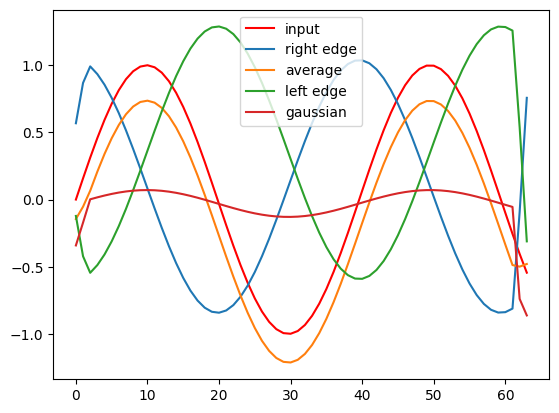

In [1]:
import torch
import matplotlib.pyplot as plt

# seq = torch.rand(1,64)
t = torch.linspace(0,10,64)
seq = torch.sin(t).unsqueeze(0)
# seq = (torch.sin(t)+torch.sin(2*t)).unsqueeze(0)
# print(seq.shape)
sp = seq.permute(1,0)
m = torch.nn.Conv1d(1, 4, 5, padding=2) # implements 4 filters with a kernel of 5 numbers
# print(m.weight)
# print(m.weight.shape)
f = torch.Tensor([[[-1,-1, 0, 1, 1]],  # right edge 
                  [[ 1/5, 1/5, 1/5, 1/5, 1/5]],  # average
                  [[ 1, 1, 0,-1,-1]],  # left edge
                  [[-1, 0, 2, 0,-1]]]) # gaussian
# print(m.weight.shape)
m.weight = torch.nn.Parameter(f)
# print("convolution filer: ")
# print(m.weight)
output = m(seq)
# print(output.shape)
op = output.permute(1,0).detach()
plt.plot(sp, 'r', label="input") # plot original sin wave in red
plt.plot(op[:,0], label="right edge") # plot 4 outputs in green
plt.plot(op[:,1], label="average") # plot 4 outputs in green
plt.plot(op[:,2], label="left edge") # plot 4 outputs in green
plt.plot(op[:,3], label="gaussian") # plot 4 outputs in green
leg = plt.legend(loc='upper center')


## 2D convolution

A 2D convolution can be applied to data arranged in 2D, for example images and image planes. 
An image is convolved by a 2d filter to produce a feature map - another image usually of smaller size. See this example illustration:

![](images/2dconv.png)

We can learn what a convolution does with a few examples. Let us load an image and plot it:

In [2]:
import torch
import torchvision
ima = torchvision.io.read_image("images/home.png")

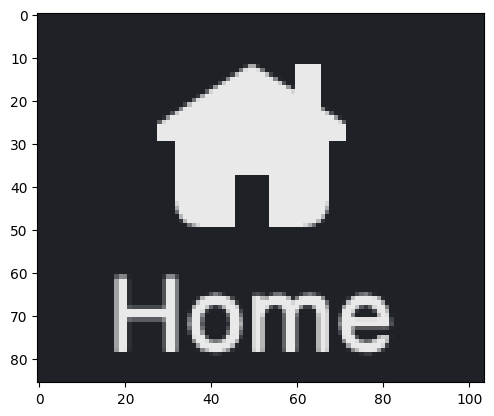

In [3]:
import matplotlib.pyplot as plt
iman = ima.permute(1, 2, 0)
# iman.shape
plt.imshow(iman)

Now we can try to run a convolutional operation from PyTorch.

Here we run 16 convolution filters of 5x5 pixels and with a stride of 2 pixels.

This runs on all 4 channels of the input image (RGBW).

You will recognize these numbers in the Conv2d operator:

In [4]:
with torch.no_grad():
    conv_layer = torch.nn.Conv2d(4, 16, 5, stride=2)
ima.shape
processed = conv_layer(ima.float())
print(processed.shape)

torch.Size([16, 41, 50])


we will now plot all the 16 images output of the Conv2d operator. You will see how each convolution processes the image. 

The convolution filter weights were randomly generated, so you will see 16 different outputs.

Some enhance vertical edges, some horizontal edges, some will blur the image, etc.

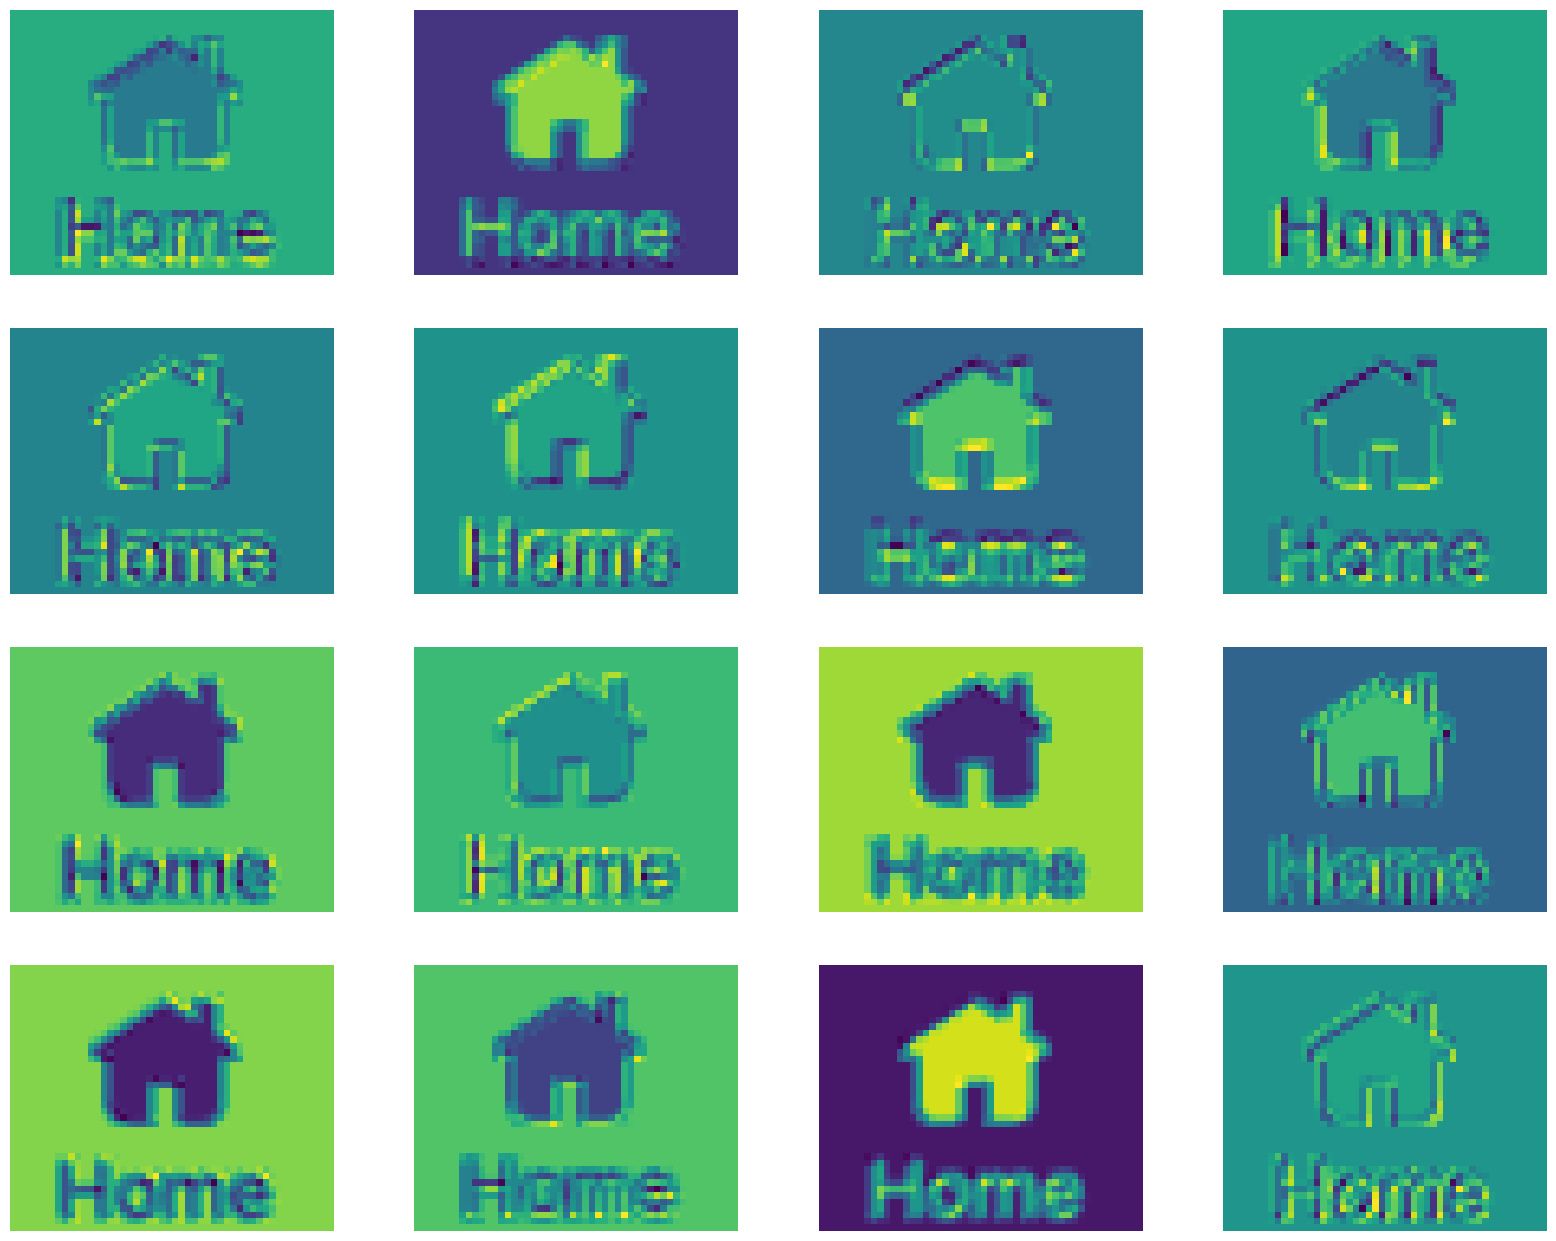

In [5]:
fig = plt.figure(figsize=(20, 20))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    processed_display = processed[i].detach().unsqueeze(0).permute(1, 2, 0)
#     print(processed_display.shape)
    imgplot = plt.imshow(processed_display)
    a.axis("off")